## Emotion Detection


#### Importing libraries:

In [2]:
import matplotlib.pyplot as plt
from glob import glob #used to create a list of all files in directory
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,Flatten,Conv2D  #dense=linearfuntion,input=size of input,dropout=used so that ml model works all data,not only training data,flatten=changes matrix into multi array
from tensorflow.keras.layers import BatchNormalization,Activation,MaxPooling2D 
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau  #reduceLROn plateau is used to decrese the learning rate of the model
from tensorflow.keras.utils import plot_model

from IPython.display import SVG,Image
import tensorflow as tf
print("Tensorflow version:",tf.__version__)

Tensorflow version: 2.16.1


#### Exploring Dataset 

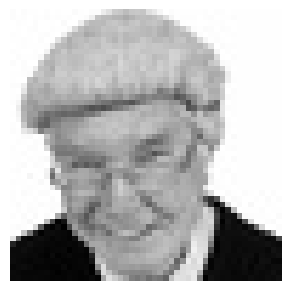

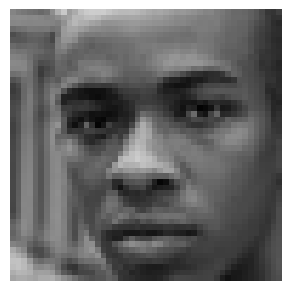

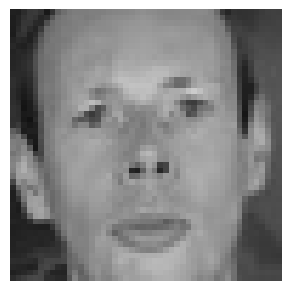

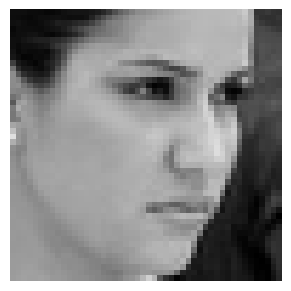

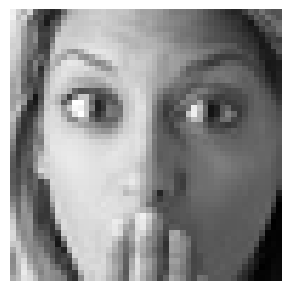

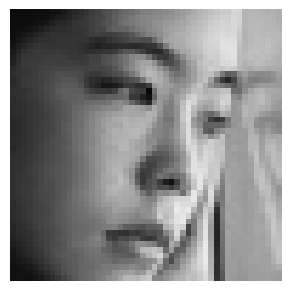

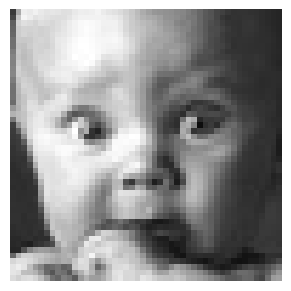

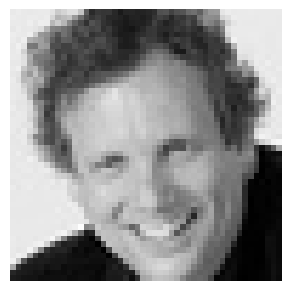

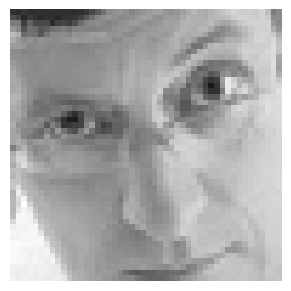

In [3]:
images=glob("train/**/**")
for i in range(9):
    image=random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

#### Preparing of data

In [4]:
img_size=48
batch_size = 64
datagen_train=ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode="categorical",
                                                   shuffle=True)
datagen_validation=ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode="categorical",
                                                   shuffle=True)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


#### Model Defining:

In [5]:
def Convolution(input_tensor,filters,kernel_size):
    x=Conv2D(filters=filters,kernel_size=kernel_size,padding="same")(input_tensor) #created convolutional layer
    x=BatchNormalization()(x)  #remove overfitting & training smootly
    x=Activation("relu")(x)    
    x=MaxPooling2D(pool_size=(2,2))(x)     #decrese dimention od data
    x=Dropout(0.25)(x)          #overcome overfitting
    return x

In [6]:
def Dense_f(input_tensor,nodes):
    x=Dense(nodes)(input_tensor)
    x=BatchNormalization()(x) 
    x=Activation("relu")(x)
    x=Dropout(0.25)(x)          #overcome overfitting
    return x
    

In [7]:
def model_fer(input_shape):
    inputs=Input(input_shape)
    conv_1=Convolution(inputs,32,(3,3))
    conv_2=Convolution(inputs,64,(5,5))
    conv_3=Convolution(inputs,128,(3,3))

    flatten=Flatten()(conv_3)

    dense_1=Dense_f(flatten,256)
    output=Dense(7,activation="softmax")(dense_1)
    model = Model(inputs=[inputs], outputs=[output])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [8]:
model=model_fer((48,48,1))
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 48, 48, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 48, 48, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 48, 48, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      18,874,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,879,239 (72.02 MB)

 Trainable params: 18,878,471 (72.02 MB)

 Non-trainable params: 768 (3.00 KB)

#### Initialization the model:

In [13]:
epochs=3
steps_per_epoch=train_generator.n//train_generator.batch_size
validation_steps=validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.weights.h5", monitor='val_accuracy', save_weights_only=True, mode='max', verbose=1)

callbacks=[checkpoint]

#### Training our model:

In [14]:
history=model.fit(
x=train_generator,steps_per_epoch=steps_per_epoch,epochs=epochs,validation_data=validation_generator,validation_steps=validation_steps,callbacks=callbacks)

Epoch 1/3
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3252 - loss: 1.8121
Epoch 1: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 711s 2s/step - accuracy: 0.3253 - loss: 1.8117 - val_accuracy: 0.2473 - val_loss: 1.8945
Epoch 2/3
  1/448 ━━━━━━━━━━━━━━━━━━━━ 6:07 822ms/step - accuracy: 0.4062 - loss: 1.6604
Epoch 2: saving model to model_weights.weights.h5


C:\Users\msate\anaconda3\envs\emotion_detection_project\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4062 - loss: 1.6604 - val_accuracy: 0.3000 - val_loss: 1.6416
Epoch 3/3
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4898 - loss: 1.3459
Epoch 3: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 571s 1s/step - accuracy: 0.4898 - loss: 1.3459 - val_accuracy: 0.4248 - val_loss: 1.5189


#### Evaluate the model:

In [15]:
model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 22s 195ms/step - accuracy: 0.4207 - loss: 1.5332


[1.5194920301437378, 0.4244914948940277]

#### Plotting Loss curve :

SyntaxError: keyword argument repeated: wspace (2923252338.py, line 6)

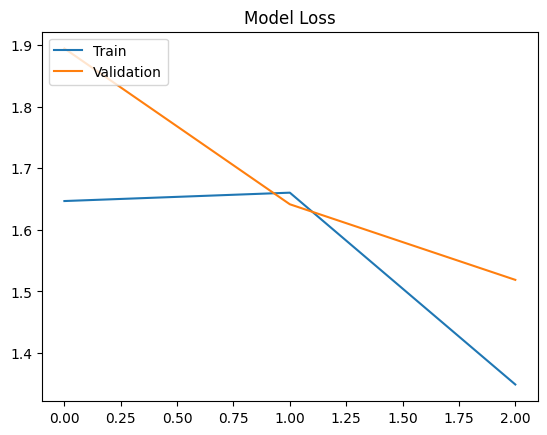

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.25,wspace=0.35)

SyntaxError: keyword argument repeated: wspace (148978011.py, line 5)

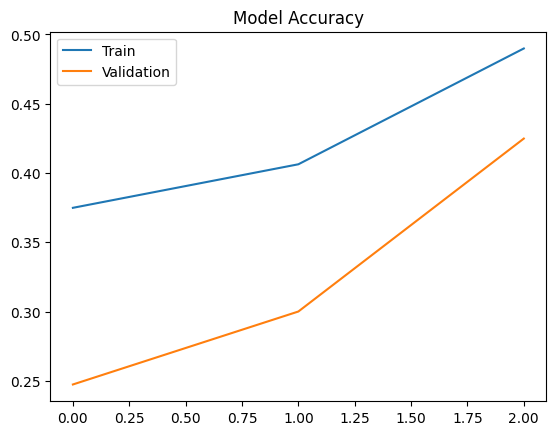

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.25,wspace=0.35)

#### Saving model :

In [18]:
model_json=model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)